In [1]:
import numpy as np
from skimage import io
import glob
from measures import compute_ave_MAE_of_methods

In [2]:
print("------0. set the data path------")

# >>>>>>> Follows have to be manually configured <<<<<<< #
data_name = 'TEST-DATA' # this will be drawn on the bottom center of the figures
data_dir = '/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-Test' # set the data directory,
                          # ground truth and results to-be-evaluated should be in this directory
                          # the figures of PR and F-measure curves will be saved in this directory as well
gt_dir = 'GT' # set the ground truth folder name
rs_dirs = ['FCN_pred','Res2Net_pred'] # set the folder names of different methods
                        # 'rs1' contains the result of method1
                        # 'rs2' contains the result of method 2
                        # we suggest to name the folder as the method names because they will be shown in the figures' legend
lineSylClr = ['r-','b-'] # curve style, same size with rs_dirs
linewidth = [2,1] # line width, same size with rs_dirs

------0. set the data path------


In [3]:
gt_name_list = glob.glob(data_dir+'/'+gt_dir+'/'+'*.jpg')
# gt = io.imread(gt_name_list[0]) # read ground truth
# gt_name = gt_name_list[0].split('/')[-1]
# gt.shape

In [ ]:
# from PIL import Image
# import os, sys

# path = '/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-Test/GT/'
# dirs = os.listdir( path )

# def resize():
#     for item in dirs:
#         if os.path.isfile(path+item):
#             im = Image.open(path+item)
#             f, e = os.path.splitext(path+item)
#             # print(f)
#             imResize = im.resize((256,256), Image.ANTIALIAS)
#             imResize.save(f + '.jpg', 'JPEG', quality=90)

# resize()

In [4]:
## get directory list of predicted maps
rs_dir_lists = []
for i in range(len(rs_dirs)):
    rs_dir_lists.append(data_dir+'/'+rs_dirs[i]+'/')
print('\n')

In [5]:
rs_dir_lists

['/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-Test/FCN_pred/',
 '/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-Test/Res2Net_pred/']

#For resnet and densenet

------1. Compute the average MAE of Methods------


>>FCN_pred: num_rs/num_gt-> 48/48, aveMAE-> 0.477
>>Res2Net_pred: num_rs/num_gt-> 48/48, aveMAE-> 0.069


------2. Compute the Precision, Recall and F-measure of Methods------


>> FCN_pred : num_rs/num_gt-> 48/48, maxF->0.689,  meanF->0.377, 
Precision:0.4986453305505263


Recall:0.698074102185272
>> Res2Net_pred : num_rs/num_gt-> 48/48, maxF->0.748,  meanF->0.712, 
Precision:0.8082935822372016


Recall:0.650712807509922


------ 3. Plot and save precision-recall curves------
>>PR-curves saved: /content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-TestTEST-DATA_pr_curves.png


------ 4. Plot and save F-measure curves------
>>F-measure curves saved: /content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-TestTEST-DATA_fm_curves.png


Done!!!


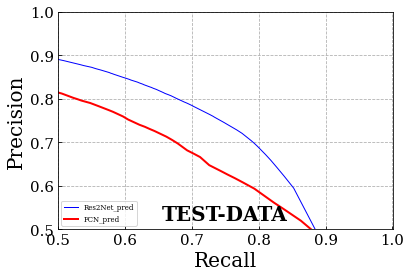

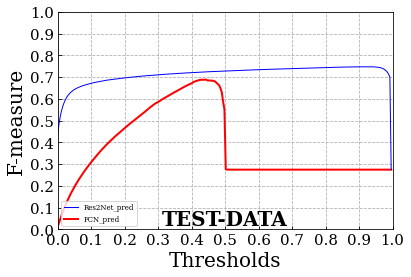

In [6]:
## 1. =======compute the average MAE of methods=========
print("------1. Compute the average MAE of Methods------")
aveMAE, gt2rs_mae = compute_ave_MAE_of_methods(gt_name_list,rs_dir_lists)
print('\n')
for i in range(0,len(rs_dirs)):
    print('>>%s: num_rs/num_gt-> %d/%d, aveMAE-> %.3f'%(rs_dirs[i], gt2rs_mae[i], len(gt_name_list), aveMAE[i]))


## 2. =======compute the Precision, Recall and F-measure of methods=========
from measures import compute_PRE_REC_FM_of_methods,plot_save_pr_curves,plot_save_fm_curves

print('\n')
print("------2. Compute the Precision, Recall and F-measure of Methods------")
PRE, REC, FM, gt2rs_fm = compute_PRE_REC_FM_of_methods(gt_name_list,rs_dir_lists,beta=0.3)
for i in range(0,FM.shape[0]):
    print(">>", rs_dirs[i],":", "num_rs/num_gt-> %d/%d,"%(int(gt2rs_fm[i][0]),len(gt_name_list)), "maxF->%.3f, "%(np.max(FM,1)[i]), "meanF->%.3f, "%(np.mean(FM,1)[i]))
    print("Precision:{}".format(np.mean(PRE,1)[i]))
    print('\n')
    print("Recall:{}".format(np.mean(REC,1)[i]))
    


print('\n')


## 3. =======Plot and save precision-recall curves=========
print("------ 3. Plot and save precision-recall curves------")
plot_save_pr_curves(PRE, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    REC, # numpy array (num_rs_dir,255)
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0.5,1.0), # the showing range of x-axis
                    yrange = (0.5,1.0), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'png') # format of the to-be-saved figure
print('\n')

## 4. =======Plot and save F-measure curves=========
print("------ 4. Plot and save F-measure curves------")
plot_save_fm_curves(FM, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    mybins = np.arange(0,256),
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0.0,1.0), # the showing range of x-axis
                    yrange = (0.0,1.0), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'png') # format of the to-be-saved figure
print('\n')

print('Done!!!')


FOR Predictions and Resnet_Unet_Predictions

------1. Compute the average MAE of Methods------


>>Predictions: num_rs/num_gt-> 48/48, aveMAE-> 0.076
>>Resnet_Unet_Predictions: num_rs/num_gt-> 48/48, aveMAE-> 0.071


------2. Compute the Precision, Recall and F-measure of Methods------
>>Processed 48/48

>> Predictions : num_rs/num_gt-> 48/48, maxF->0.744,  meanF->0.661, 
>> Resnet_Unet_Predictions : num_rs/num_gt-> 48/48, maxF->0.747,  meanF->0.714, 


------ 3. Plot and save precision-recall curves------
>>PR-curves saved: /content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-TestTEST-DATA_pr_curves.png


------ 4. Plot and save F-measure curves------
>>F-measure curves saved: /content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-TestTEST-DATA_fm_curves.png


Done!!!


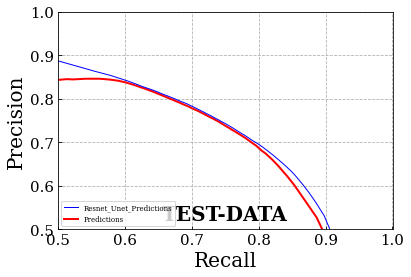

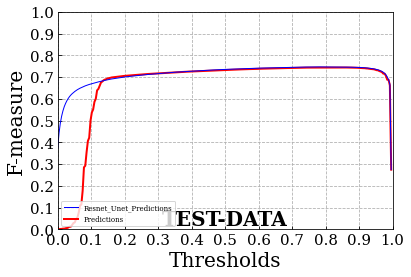

In [ ]:
## 1. =======compute the average MAE of methods=========
print("------1. Compute the average MAE of Methods------")
aveMAE, gt2rs_mae = compute_ave_MAE_of_methods(gt_name_list,rs_dir_lists)
print('\n')
for i in range(0,len(rs_dirs)):
    print('>>%s: num_rs/num_gt-> %d/%d, aveMAE-> %.3f'%(rs_dirs[i], gt2rs_mae[i], len(gt_name_list), aveMAE[i]))


## 2. =======compute the Precision, Recall and F-measure of methods=========
from measures import compute_PRE_REC_FM_of_methods,plot_save_pr_curves,plot_save_fm_curves

print('\n')
print("------2. Compute the Precision, Recall and F-measure of Methods------")
PRE, REC, FM, gt2rs_fm = compute_PRE_REC_FM_of_methods(gt_name_list,rs_dir_lists,beta=0.3)
for i in range(0,FM.shape[0]):
    print(">>", rs_dirs[i],":", "num_rs/num_gt-> %d/%d,"%(int(gt2rs_fm[i][0]),len(gt_name_list)), "maxF->%.3f, "%(np.max(FM,1)[i]), "meanF->%.3f, "%(np.mean(FM,1)[i]))
print('\n')


## 3. =======Plot and save precision-recall curves=========
print("------ 3. Plot and save precision-recall curves------")
plot_save_pr_curves(PRE, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    REC, # numpy array (num_rs_dir,255)
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0.5,1.0), # the showing range of x-axis
                    yrange = (0.5,1.0), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'png') # format of the to-be-saved figure
print('\n')

## 4. =======Plot and save F-measure curves=========
print("------ 4. Plot and save F-measure curves------")
plot_save_fm_curves(FM, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    mybins = np.arange(0,256),
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0.0,1.0), # the showing range of x-axis
                    yrange = (0.0,1.0), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'png') # format of the to-be-saved figure
print('\n')

print('Done!!!')


FOR res_pred and Unet_predictions2 (Dont use pred and Predictions2)

In [ ]:
rs_dir_lists = []
for i in range(len(rs_dirs)):
    rs_dir_lists.append(data_dir+'/'+rs_dirs[i]+'/')
print('\n')

In [ ]:
rs_dir_lists

['/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-Test/res_pred/',
 '/content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-Test/ResUnet_2/']

------1. Compute the average MAE of Methods------


>>res_pred: num_rs/num_gt-> 48/48, aveMAE-> 0.074
>>ResUnet_2: num_rs/num_gt-> 48/48, aveMAE-> 0.070


------2. Compute the Precision, Recall and F-measure of Methods------
>>Processed 48/48

>> res_pred : num_rs/num_gt-> 48/48, maxF->0.743,  meanF->0.712, 
>> ResUnet_2 : num_rs/num_gt-> 48/48, maxF->0.753,  meanF->0.686, 


------ 3. Plot and save precision-recall curves------
>>PR-curves saved: /content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-TestTEST-DATA_pr_curves.png


------ 4. Plot and save F-measure curves------
>>F-measure curves saved: /content/drive/My Drive/COVID-SemiSeg/COVID-SemiSeg/Dataset/TestingSet/LungInfection-TestTEST-DATA_fm_curves.png


Done!!!


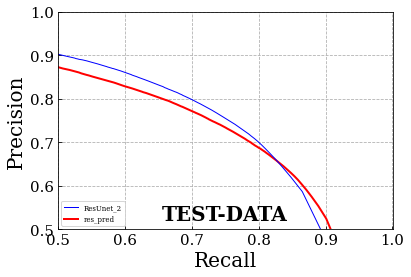

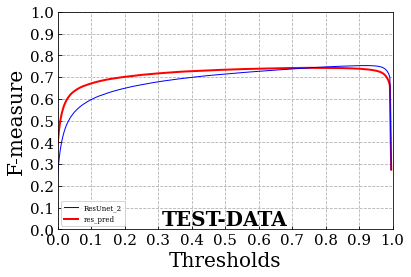

In [ ]:
## 1. =======compute the average MAE of methods=========
print("------1. Compute the average MAE of Methods------")
aveMAE, gt2rs_mae = compute_ave_MAE_of_methods(gt_name_list,rs_dir_lists)
print('\n')
for i in range(0,len(rs_dirs)):
    print('>>%s: num_rs/num_gt-> %d/%d, aveMAE-> %.3f'%(rs_dirs[i], gt2rs_mae[i], len(gt_name_list), aveMAE[i]))


## 2. =======compute the Precision, Recall and F-measure of methods=========
from measures import compute_PRE_REC_FM_of_methods,plot_save_pr_curves,plot_save_fm_curves

print('\n')
print("------2. Compute the Precision, Recall and F-measure of Methods------")
PRE, REC, FM, gt2rs_fm = compute_PRE_REC_FM_of_methods(gt_name_list,rs_dir_lists,beta=0.3)
for i in range(0,FM.shape[0]):
    print(">>", rs_dirs[i],":", "num_rs/num_gt-> %d/%d,"%(int(gt2rs_fm[i][0]),len(gt_name_list)), "maxF->%.3f, "%(np.max(FM,1)[i]), "meanF->%.3f, "%(np.mean(FM,1)[i]))
print('\n')


## 3. =======Plot and save precision-recall curves=========
print("------ 3. Plot and save precision-recall curves------")
plot_save_pr_curves(PRE, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    REC, # numpy array (num_rs_dir,255)
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0.5,1.0), # the showing range of x-axis
                    yrange = (0.5,1.0), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'png') # format of the to-be-saved figure
print('\n')

## 4. =======Plot and save F-measure curves=========
print("------ 4. Plot and save F-measure curves------")
plot_save_fm_curves(FM, # numpy array (num_rs_dir,255), num_rs_dir curves will be drawn
                    mybins = np.arange(0,256),
                    method_names = rs_dirs, # method names, shape (num_rs_dir), will be included in the figure legend
                    lineSylClr = lineSylClr, # curve styles, shape (num_rs_dir)
                    linewidth = linewidth, # curve width, shape (num_rs_dir)
                    xrange = (0.0,1.0), # the showing range of x-axis
                    yrange = (0.0,1.0), # the showing range of y-axis
                    dataset_name = data_name, # dataset name will be drawn on the bottom center position
                    save_dir = data_dir, # figure save directory
                    save_fmt = 'png') # format of the to-be-saved figure
print('\n')

print('Done!!!')
